# My Proposal:

### Which Dataset did you select and why?

I selected Olympics dataset because I think it contains numeric data which will help me to analyze and find patterns easily.


### Describe the steps you took to import and clean the data.

#### Importing Module:

In [1]:
import pandas as pd
import psycopg2 as ps4

from sqlalchemy import create_engine


import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
sns.set(style = 'darkgrid')

%matplotlib inline



#### Setting Connection with DataBase:

In [3]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
               "@{host}:{port}/{database}")
print(cnxn_string)

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


In [4]:
engine = create_engine(cnxn_string.format(
    username="postgres", 
    pswd="Sadworld@5", 
    host="localhost", 
    port=5432,
    database="CapStone"))

#### Importing Data:

In [5]:
na_vals = ['NA','Missing']
athlete_events = pd.read_csv("D:\\Dataset_ash\\SQL Case Study\\athlete_events.csv",na_values = na_vals)
noc_regions =    pd.read_csv("D:\\Dataset_ash\\SQL Case Study\\noc_regions.csv")

In [6]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
noc_regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [10]:
#checking the dimension of athlete dataset:
athlete_events.shape

(271116, 15)

In [11]:
#checking the dimension of noc regeions:
noc_regions.shape

(230, 3)

#### Cleaning Data Process

In [12]:
#checking null percentage for athlete events:
athlete_events.isnull().sum()/athlete_events.shape[0]*100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64

In [13]:
#checking null percentage for noc regions:
noc_regions.isnull().sum()/noc_regions.shape[0]*100

NOC        0.000000
region     1.304348
notes     90.869565
dtype: float64

**My assumption regarding cleaning** 
+ Not cleaning duplicate rows because participants can participate in diffent season and years.
+ 85% data is missing in Medal column but i think deleting missing values from this column can lead to misleading result. 
+ In **Age** column *3%* data is missing, i will delete those rows, it will not impact in our result.
+ In **Height** and **Weight** columns *22%* and *23%* data is missing I will those fill missing value by taking an average of both columns. 


#### Histogram of Age columns before cleaning:

C:\Users\thapa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

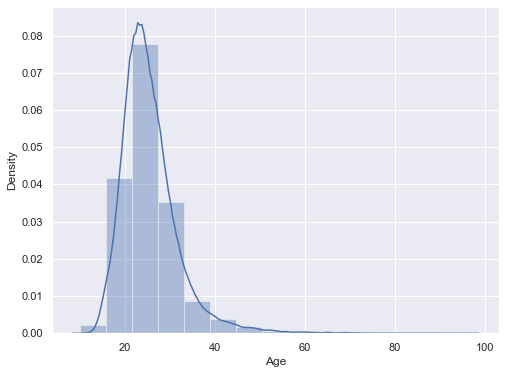

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(athlete_events['Age'],bins = 15)

In [15]:
#fill nan values as No medal.
athlete_events['Medal'].fillna('No Medal',inplace = True)

In [16]:
#removing 3% missing data from age columns:
athlete_events.dropna(axis = 'index', how = 'any' , subset = ['Age'],inplace = True)

In [17]:
athlete_events['Age'].isnull().sum()

0

#### Histogram of age column after cleaning:

C:\Users\thapa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

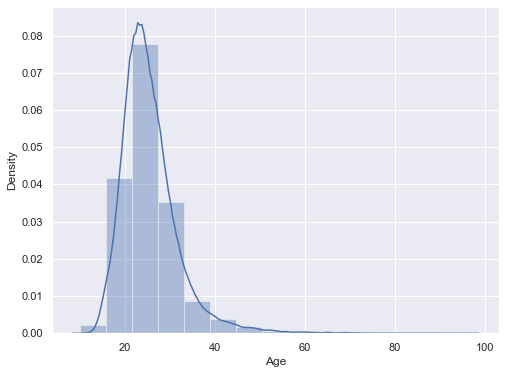

In [18]:
#no significant impact in result:
plt.figure(figsize=(8,6))
sns.distplot(athlete_events['Age'],bins=15)

#### Histogram of height column before filling nan values:

<AxesSubplot:xlabel='Height', ylabel='Count'>

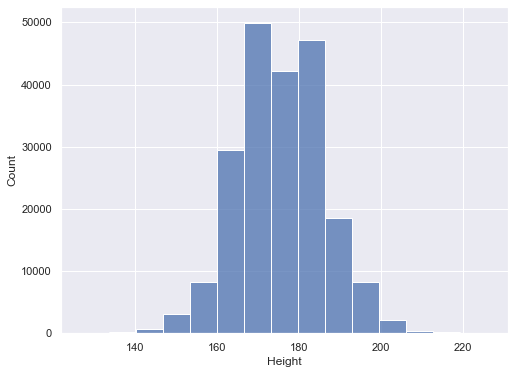

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(athlete_events['Height'],bins=15)

In [20]:
height_avg = athlete_events['Height'].mean()
height_avg 

175.3513671763429

In [21]:
height_median = athlete_events['Height'].median()
height_median

175.0

In [22]:
height_mode = athlete_events['Height'].mode()
height_mode

0    180.0
dtype: float64

In [23]:
#i am taking height_median to fill those missing value:
athlete_events['Height'].fillna(height_median,inplace= True)

In [24]:
athlete_events['Height'].isnull().sum()

0

#### Histogram after filling all nan values:

<AxesSubplot:xlabel='Height', ylabel='Count'>

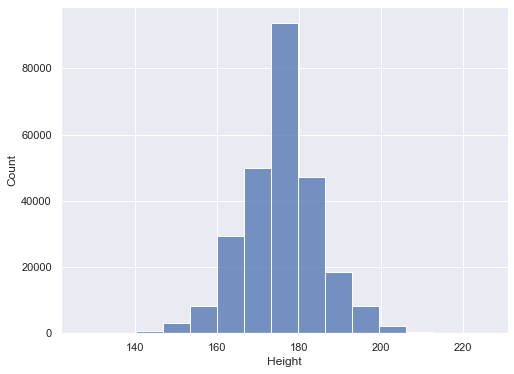

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(athlete_events['Height'],bins = 15)

#### Histogram of weight columns before filling nan value: 

<AxesSubplot:xlabel='Weight', ylabel='Count'>

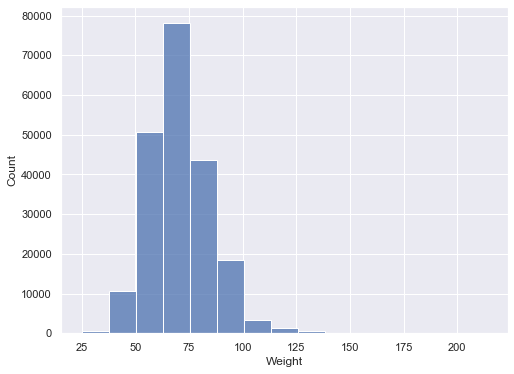

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(athlete_events['Weight'],bins = 15)

In [27]:
weight_mean = athlete_events['Weight'].mean()
weight_mean

70.7126034940857

In [28]:
weight_median = athlete_events['Weight'].median()
weight_median

70.0

In [29]:
weight_mode = athlete_events['Weight'].mode()
weight_mode

0    70.0
dtype: float64

In [30]:
# i am taking median to fill all those weight columns:
athlete_events['Weight'].fillna(weight_median,inplace = True)

In [31]:
athlete_events['Weight'].isnull().sum()

0

#### Histogram after filling nan value:

<AxesSubplot:xlabel='Weight', ylabel='Count'>

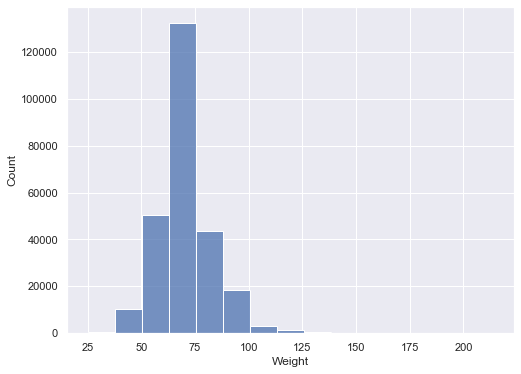

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(athlete_events['Weight'],bins =15)

In [33]:
#checking null values:
athlete_events.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

### Performing Initial exploration of data:

#### Athlete by each region:

In [34]:
query_1 = """
select 
    ng.region as "REGION",
    count(distinct ae."ID") as number_of_players
from
    athlete_events as ae
Left Outer Join 
    noc_regions ng
on ae."NOC" = ng."NOC"
group by 1 
order by 2 desc;
"""

In [35]:
athlete_by_country = pd.read_sql_query(query_1,engine)
athlete_by_country.head()

,REGION,number_of_players
0,USA,9499
1,Germany,7475
2,UK,5789
3,Russia,5462
4,France,5200


#### Medal by Country:

In [36]:
query_2 = """
select 
    ng.region as REGION,
    ae."Medal" as Medal,
    count("ID") as number_of_medals
from
    athlete_events as ae
Left Outer Join 
    noc_regions ng
on ae."NOC" = ng."NOC"
WHERE "Medal" != 'No Medal'
group by 1 ,2
order by 3 desc;
"""

In [37]:
medal_by_country = pd.read_sql_query(query_2,engine)
medal_by_country.head()

,region,medal,number_of_medals
0,USA,Gold,2627
1,USA,Silver,1619
2,Russia,Gold,1599
3,USA,Bronze,1346
4,Germany,Gold,1293


#### Athlete with more than 1 medal:

In [38]:
query_3 = """
select 
    distinct ae."ID",
    ae."Name",
    ng.region as REGION,
    count(ae."Medal") as number_of_medals
from
    athlete_events as ae
Left Outer Join 
    noc_regions ng
on ae."NOC" = ng."NOC"
WHERE "Medal" != 'No Medal'
group by 1,2,3
having count(ae."Medal") > 1
order by 4 desc; 
"""

In [39]:
athlete_medal = pd.read_sql_query(query_3,engine)
athlete_medal.head()

,ID,Name,region,number_of_medals
0,94406,"Michael Fred Phelps, II",USA,28
1,67046,Larysa Semenivna Latynina (Diriy-),Russia,18
2,4198,Nikolay Yefimovich Andrianov,Russia,15
3,11951,Ole Einar Bjrndalen,Norway,13
4,74420,Edoardo Mangiarotti,Italy,13


#### Male and Female participants and medal proportion: 

In [40]:
query_4 = """
select 
    "Sex",
    count("ID") as Number_of_players,
    count( Case when "Medal" in ('Gold','Silver','Bronze') then "Medal"
                else NULL
           end) as medals
from
    athlete_events

group by 1
order by 2 desc  
"""

In [41]:
gender_obs = pd.read_sql_query(query_4 , engine)
gender_obs

,Sex,number_of_players,medals
0,M,187544,27815
1,F,74098,11236


<AxesSubplot:title={'center':'Gender Proportion'}, xlabel='Sex'>

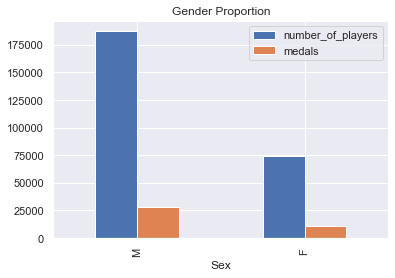

In [42]:
gender_obs.plot.bar('Sex',y=['number_of_players','medals'],title = 'Gender Proportion')

<AxesSubplot:xlabel='Sex', ylabel='medals'>

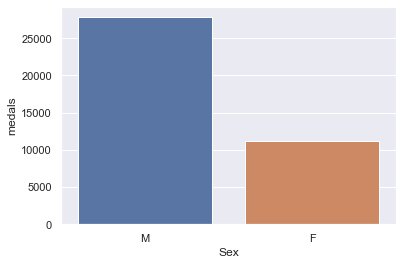

In [43]:
sns.barplot(x = gender_obs['Sex'], y = gender_obs['medals'])

<AxesSubplot:xlabel='Sex', ylabel='number_of_players'>

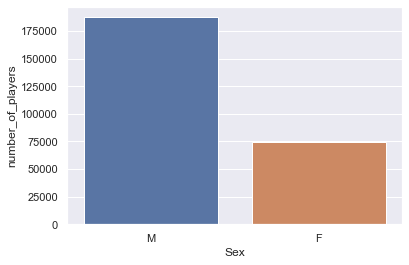

In [44]:
sns.barplot(x = gender_obs['Sex'], y = gender_obs['number_of_players'])

#### Games with more observation:

In [45]:
query_5 = """
select
    distinct("Games"),
    "City",
    count("ID")
from
    athlete_events
group by 1,2
order by 3 desc
"""

In [46]:
game_obs = pd.read_sql_query(query_5,engine)
game_obs.head()

,Games,City,count
0,2000 Summer,Sydney,13820
1,1996 Summer,Atlanta,13772
2,2016 Summer,Rio de Janeiro,13688
3,2008 Summer,Beijing,13600
4,2004 Summer,Athina,13443


### Proposed ERD to show the relationship of the data.

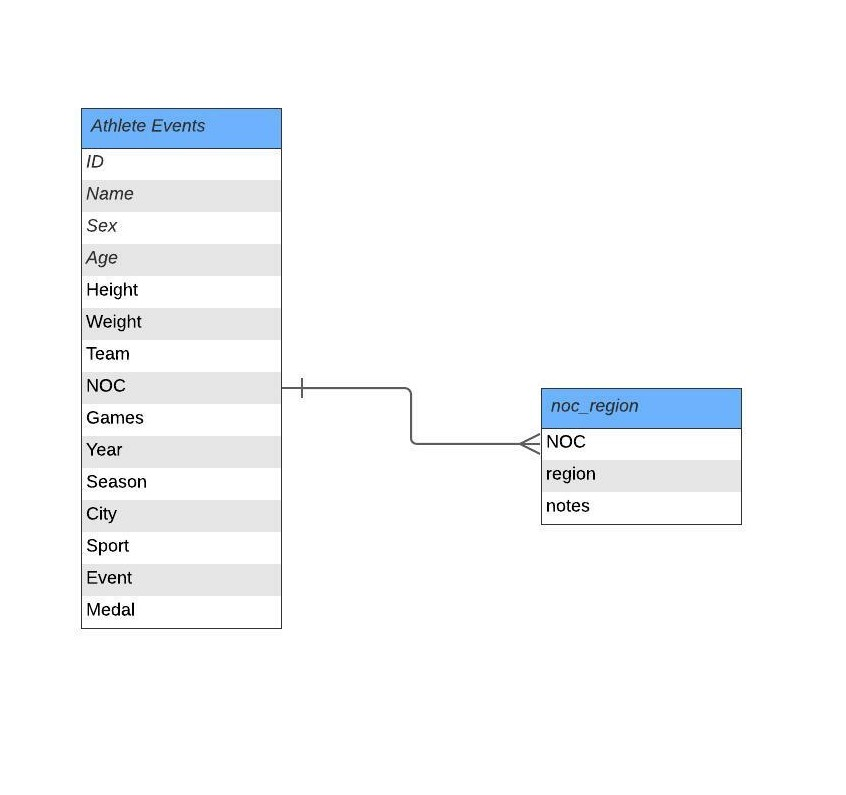

In [47]:
from IPython import display
display.Image("C:\\Users\\thapa\\Pictures\\Blank diagram - ERD with colored entities (UML notation).jpeg")

# Develop Project Proposal:

### Description 

My project's purpose is to learn more about the results of the Olympic Games (medals). To help me understand the data, I'm hoping to gather evidence regarding the nation, gender, sex, and years.

Journalists, trainers, and countries (governments) who want to know what's going on in the world.
would be interested in my findings in order to publish them in the Olympics Games over the years.improve results (journalists) or obtain information (journalists) (coaches and countries).

### Questions

+ **What has been the demographics of Olympics?** 
+ **Which country has been winning the most medals?**
+ **Which country has been encouraging female participation in sports over the years?**



### Hypothesis:

+ The age group 20-25 is the most represented. 
+ US is the most regular country along the years (measure: number of participants and medals).
+ Women in developed countries participate more and get better results (won more medals).